In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/Section1_Project/sec1_project_data.csv'

Mounted at /content/drive


# GOAL: 다음 분기에 어떤 게임을 설계해야 할까?

# 1.데이터 전처리

## 1.1 데이터 기초 현황 파악

---



In [4]:
### 데이터프레임 기초 분석 
df = pd.read_csv(url)
print(df)
df = df.drop(['Unnamed: 0'], axis = 1, inplace = False)
print(df)
df.info() #rows: 19596개 columns: 0~8, 9개
df.describe() #Year만 그나마 정상적으로 들어있고 나머지는 형변환 해주어야한다.
print(df.columns) # columns 바로 복붙할 수 있게 프린트

#자료형: 문자 - 'Name', 'Platform', 'Genre', 'Publisher' ///// 숫자:'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'

       Unnamed: 0  ... Other_Sales
0               1  ...           0
1               2  ...        0.01
2               3  ...           0
3               4  ...           0
4               5  ...        0.04
...           ...  ...         ...
16593       16594  ...        0.01
16594       16595  ...           0
16595       16596  ...        0.13
16596       16597  ...        0.03
16597       16598  ...        0.01

[16598 rows x 10 columns]
                                                 Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  .

## 1.2 판매량 단위 통일

---



In [7]:
# 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
#Sales는 결측치 없으니깐 먼저 정리해준다. #NA_Sales로 테스트 
# M을 다 삭제해준다. 
#'K'를 '000'으로 대체하고 'M"으로 나누어줘야한다.

def num_arrage(x):
    if type(x) == float or type(x) == int:
      return x 
    if 'K' in x:
      if len(x) > 1:
        return float(x.replace('K','')) * 0.001
      return x
    if 'M' in x:
      if len(x) > 1:
        return float(x.replace('M',''))
    return x

pd.set_option('display.max_rows', None) # 열의 전체 행 확인할 수 있음.
df['NA_Sales'] = df['NA_Sales'].apply(num_arrage).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(num_arrage).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(num_arrage).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(num_arrage).astype(float)
df.describe()
pd.set_option('display.max_rows', 15)
df = df.rename(columns ={'NA_Sales':'NA_Sales(M)','EU_Sales' :'EU_Sales(M)',
                    'JP_Sales':'JP_Sales(M)', 'Other_Sales':'Other_Sales(M)'})

## 1.3 합계 판매량 추출

---



In [8]:
df.info()
# df.loc[10] #NA,EU,JP,Other 모두 제대로 되었는지 확인해보기
# 분석의 편의를 위해 Total_Sales(M)추가
df['Total_Sales(M)'] = df['NA_Sales(M)'] + df['EU_Sales(M)'] + df['JP_Sales(M)'] + df['Other_Sales(M)']
df
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16598 non-null  object 
 1   Platform        16598 non-null  object 
 2   Year            16327 non-null  float64
 3   Genre           16548 non-null  object 
 4   Publisher       16540 non-null  object 
 5   NA_Sales(M)     16598 non-null  float64
 6   EU_Sales(M)     16598 non-null  float64
 7   JP_Sales(M)     16598 non-null  float64
 8   Other_Sales(M)  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


,Year,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1994.242543,0.264667,0.146652,0.077782,0.048063,0.537164
std,155.077168,0.816683,0.505351,0.309291,0.188588,1.555151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 1.4 플랫폼 수치 확인 및 정리

---



In [9]:
#게임기타입 재정리 /// 검색할 때 OOO console game 이라고 검색하면 바로 나온다. 
pd.set_option('display.max_rows', 32)
df['Platform'].count()
df['Platform'] = df['Platform'].replace('2600', 'Atari 2600')
print(df['Platform'].value_counts())
df['Platform'].count()

DS            2163
PS2           2161
PS3           1329
Wii           1325
X360          1265
PSP           1213
PS            1196
PC             960
XB             824
GBA            822
GC             556
3DS            509
PSV            413
PS4            336
N64            319
SNES           239
XOne           213
SAT            173
WiiU           143
Atari 2600     133
GB              98
NES             98
DC              52
GEN             27
NG              12
SCD              6
WS               6
3DO              3
TG16             2
GG               1
PCFX             1
Name: Platform, dtype: int64


16598

## 1.5 연도 표시 보완

---



In [10]:
import math

#Year 조정해주기 
def year_arrage(x):
    if x < 100:
      if x < 20:
        return 2000 + x
      if x >= 20:
        return 1900 + x
    return x 
pd.set_option('display.max_rows', None)
df['Year'] = df['Year'].apply(year_arrage)
df['Year'].isnull().sum()
df.describe()

,Year,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537164
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555151
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
import seaborn as sns

## 1.6 Year/Genre 결측치 채우기


---





In [14]:
print(df['Total_Sales(M)'].describe())
# sns.distplot(df['Total_Sales(M)'])
# df['Total_Sales(M)'].plot(kind='box', figsize=(10,8),fontsize=20)
Total_Q1 = df['Total_Sales(M)'].describe()['25%']
condition_year = (df['Year'].isnull() == True) & (df['Total_Sales(M)'] >= 0.06)
df[condition_year].sort_values(by='Total_Sales(M)', ascending=False).head(15)
df.iloc[6949,2] = 2003
df.iloc[10965,2] = 2003
df.iloc[3347,2] = 2008
df.iloc[3562,2] = 2005
df.iloc[16275,2] = 1978
df.iloc[31,2] = 2007
df.iloc[13327,2] = 2001
df.iloc[8529,2] = 2008
df.iloc[2130,2] = 2006
df.iloc[4181,2] = 2007
df.iloc[12986,2] = 2010
df.iloc[10776,2] = 2009
df.iloc[11309,2] = 1998
df.iloc[9240,2] = 2011
df.iloc[9958,2] = 2008
df.iloc[5720,2] = 1980

df[condition_year].sort_values(by='Total_Sales(M)', ascending=False).head(15)
df.iloc[3031,2] = 1997
df.iloc[3942,2] = 1999
df.iloc[12858,2] = 2007
df.iloc[5674,2] = 2002
df.iloc[13752,2] = 2002
df.iloc[14765,2] = 1977
df.iloc[15317,2] = 2011
df.iloc[14585,2] = 2002
df.iloc[11316,2] = 1977
df.iloc[5309,2] = 2011
df.iloc[5144,2] = 2010
df.iloc[4165,2] = 2002
df.iloc[14580,2] = 2008
df.iloc[11665,2] = 2011

df[condition_year].sort_values(by='Total_Sales(M)', ascending=False).head(15)
df.iloc[4488,2] = 2011
df.iloc[10301,2] = 2006
df.iloc[7682,2] = 2002
df.iloc[4255,2] = 2008
df.iloc[14968,2] = 2008
df.iloc[16278,2] = 2010
df.iloc[12390,2] = 2004
df.iloc[10563,2] = 2011
df.iloc[4196,2] = 2011
df.iloc[3291,2] = 2005
df.iloc[13357,2] = 2011
df.iloc[10084,2] = 2008
df.iloc[1041,2] = 2002
df.iloc[1404,2] = 2006

df[condition_year].sort_values(by='Total_Sales(M)', ascending=False).head(15)
df.iloc[14049,2] = 2006
df.iloc[2056,2] = 2007
df.iloc[2142,2] = 2005
df.iloc[2492,2] = 2001
df.iloc[12787,2] = 2002
df.iloc[9698,2] = 2004
df.iloc[12816,2] = 2003
df.iloc[6575,2] = 1980
df.iloc[8600,2] = 2009
df.iloc[8651,2] = 2010
df.iloc[6118,2] = 2003
df.iloc[952,2] = 2006
df.iloc[16053,2] = 1982

df[condition_year].sort_values(by='Total_Sales(M)', ascending=False).head(15)
# df.describe() # year 변경치가 바뀜.
# df.info() #57개 Total_Sales가 높은 상위 57개, 평균치가 0.53, 상위25%가 0.47
df.iloc[5230,2] = 1980
df.iloc[15013,2] = 2008
df.iloc[12536,2] = 2004
df.iloc[2527,2] = 1978
df.iloc[14622,2] = 2008
df.iloc[9920,2] = 1978
df.iloc[13656,2] = 2010
df.iloc[3605,2] = 2011
df.iloc[9762,2] = 2011
df.iloc[11386,2] = 2002
df.iloc[1884,2] = 2001
df.iloc[12417,2] = 2008
df.iloc[12703,2] = 2008

df[condition_year].sort_values(by='Total_Sales(M)', ascending=False).head(15)
# df.info() #70개 NA_Sales가 높은 상위 13개, 평균치가 0.26, 상위25%가 0.24
# df.describe()
df[condition_year].sort_values(by='NA_Sales(M)', ascending=False).head(15) 
df.iloc[4617,2] = 1978
df.iloc[10269,2] = 2010
df.iloc[11508,2] = 2002
df.iloc[11125,2] = 1980
df.iloc[11837,2] = 1979
df.iloc[5160,2] = 2010
df.iloc[6779,2] = 2007
df.iloc[9640,2] = 2002
df.iloc[13902,2] = 1977
df.iloc[6223,2] = 2008
df.iloc[12616,2] = 1978
df.iloc[11405,2] = 2005
df.iloc[16195,2] = 2010
# NA 상위 25% 결측치 완료 

df[condition_year].sort_values(by='EU_Sales(M)', ascending=False).head(15) #EU 상위 25% 결측치
df.iloc[1572,2] = 2013
df.iloc[9577,2] = 2011
df.iloc[5140,2] = 2010
df.iloc[1301,2] = 2014
df.iloc[2552,2] = 2007
df.iloc[10775,2] = 2013
df.iloc[3895,2] = 2010
df.iloc[10321,2] = 2011
df.iloc[10119,2] = 2011
df.iloc[10896,2] = 2004
df.iloc[9082,2] = 2010
df.iloc[10346,2] = 2011
df.iloc[15216,2] = 2002
df.iloc[10431,2] = 2000
df.iloc[13256,2] = 2011

df[condition_year].sort_values(by='EU_Sales(M)', ascending=False).head(15)
#EU 상위 25% 결측치 완료

df[condition_year].sort_values(by='JP_Sales(M)', ascending=False).head(15) #JP 상위 25% = 0.04
df.iloc[13678,2] = 1999
df.iloc[10156,2] = 2004 ##100개
df.iloc[3182,2] = 2010
df.iloc[13190,2] = 2011
df.iloc[430,2] = 1997
df.iloc[10092,2] = 1989
df.iloc[2026,2] = 2002
df.iloc[9684,2] = 2006
df.iloc[5728,2] = 2003
df.iloc[11584,2] = 2006
df.iloc[16130,2] = 2012
df.iloc[12799,2] = 2003
df.iloc[6209,2] = 2006
df.iloc[1534,2] = 2008
df.iloc[5055,2] = 2005

df[condition_year].sort_values(by='JP_Sales(M)', ascending=False).head(15) #JP 상위 25% = 0.04
df.iloc[7847,2] = 2005
df.iloc[13589,2] = 2008
df.iloc[9016,2] = 2008
df.iloc[10094,2] = 2009
df.iloc[6152,2] = 2008
df.iloc[2970,2] = 2006
df.iloc[13162,2] = 2011
df.iloc[6178,2] = 2009
df.iloc[13406,2] = 2010
df.iloc[13734,2] = 2010
df.iloc[10327,2] = 2006

df[condition_year].sort_values(by='Other_Sales(M)', ascending=False).head(15) #NA,EU,JP,Other,Total까지 모두 상위 25% 결측치 해결 완료 
# 전체 결측치 271개 중 124개 수정. 45% 복원 완료!!

count    16598.000000
mean         0.537164
std          1.555151
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Total_Sales(M), dtype: float64


,Name,Platform,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
8350,Jet X20,PS2,NaN,Racing,Unknown,0.11,0.09,0.0,0.03,0.23
1011,Tribes: Aerial Assault,PS2,NaN,Shooter,Unknown,0.11,0.09,0.0,0.03,0.23
1285,Mega Man X Collection,PS2,NaN,Misc,Unknown,0.12,0.09,0.0,0.03,0.24
7008,College Hoops 2K6,PS2,NaN,Sports,Unknown,0.12,0.10,0.0,0.03,0.25
15669,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.0,0.03,0.21
15406,NBA Starting Five,PS2,NaN,Sports,Unknown,0.09,0.07,0.0,0.02,0.18
15402,James Cameron's Dark Angel,PS2,NaN,Action,Universal Interactive,0.08,0.07,0.0,0.02,0.17
1613,Street Fighter IV,PC,NaN,Fighting,Capcom,0.07,0.04,0.0,0.02,0.13
10324,DanceDanceRevolution II,Wii,NaN,Misc,Konami Digital Entertainment,0.22,0.00,0.0,0.02,0.24
8333,Splatterhouse,PS3,NaN,Action,Namco Bandai Games,0.13,0.02,0.0,0.02,0.17


In [16]:
# Genre 결측치 50개 한번 직접 살펴보기
print(df['Genre'].value_counts())
condition_genre = (df['Genre'].isnull() == True)
pd.set_option('display.max_rows', 30)
df[condition_genre].sort_values(by='Total_Sales(M)', ascending=False).head(30)

df.iloc[ 1971 , 3 ] = 'Role-Playing'
df[condition_genre].sort_values(by='Total_Sales(M)', ascending=False).head(30)
df.iloc[ 4598, 3 ] = 'Misc'
df.iloc[ 9488, 3 ] = 'Role-Playing'
df.iloc[ 12331, 3 ] = 'Action'
df.iloc[ 15526, 3 ] = 'Action'
df.iloc[ 16587, 3 ] = 'Racing'
df.iloc[ 5668, 3 ] = 'Role-Playing'
df.iloc[ 3932, 3 ] = 'Sports'
df.iloc[ 11063, 3 ] = 'Action'
df.iloc[ 11496, 3 ] = 'Racing'
df.iloc[ 14930, 3 ] = 'Action'
df.iloc[ 4148, 3 ] = 'Role-Playing'
df.iloc[ 15211, 3 ] = 'Shooter'
df.iloc[ 15426, 3 ] = 'Misc'
df.iloc[ 50, 3 ] = 'Platform'
df.iloc[ 1328, 3 ] = 'Sports'
df.iloc[ 1582, 3 ] = 'Action'
df.iloc[ 4545, 3 ] = 'Action'
df.iloc[ 7336, 3 ] = 'Sports'
df.iloc[ 408, 3 ] = 'Sports'
df.iloc[ 12314, 3 ] = 'Sports'
df.iloc[ 2043, 3 ] = 'Racing'
df.iloc[ 11050, 3 ] = 'Simulation'
df.iloc[ 3353, 3 ] = 'Shooter'
df.iloc[ 10874, 3 ] = 'Misc'
df.iloc[ 2497, 3 ] = 'Action'
df.iloc[ 16091, 3 ] = 'Puzzle'
df.iloc[ 16431, 3 ] = 'Racing'
df.iloc[ 4349, 3 ] = 'Puzzle'
df.iloc[ 12982, 3 ] = 'Action'
df.iloc[ 11668, 3 ] = 'Shooter'
df[condition_genre].sort_values(by='Total_Sales(M)', ascending=False).head(30) #상위 37가지 genre 재정렬

Action          3313
Sports          2346
Misc            1737
Role-Playing    1487
Shooter         1311
Adventure       1280
Racing          1247
Platform         885
Simulation       866
Fighting         847
Strategy         680
Puzzle           580
Name: Genre, dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
11268,Cloudy With a Chance of Meatballs,PS3,2009.0,NaN,Ubisoft,0.09,0.01,0.00,0.01,0.11
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.00,0.00,0.09
10432,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,NaN,Vivendi Games,0.08,0.00,0.00,0.01,0.09
12340,Virtual Chess 64,N64,1998.0,NaN,Titus,0.05,0.01,0.00,0.00,0.06
7797,Myth Makers: Orbs of Doom,Wii,2007.0,NaN,Popcorn Arcade,0.05,0.00,0.00,0.00,0.05
13348,Treasure Report: Kikai Jikake no Isan,DS,2011.0,NaN,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
5945,Medabots: Metabee,GBA,2002.0,NaN,Natsume,0.04,0.01,0.00,0.00,0.05
11699,Time Travelers,PSV,2012.0,NaN,Level 5,0.00,0.00,0.05,0.00,0.05
10501,Bakemonogatari Portable,PSP,2012.0,NaN,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
12870,PQ2: Practical Intelligence Quotient,PSP,2006.0,NaN,D3Publisher,0.04,0.00,0.00,0.00,0.04


#  2.데이터 분석



In [17]:
pd.set_option('display.max_rows', 25)
df.sort_values(by='Total_Sales(M)', ascending=False).head(50)


,Name,Platform,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
6458,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.90
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
14665,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
12405,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52


In [18]:
df.info() #year 148, genre 19, Publisher 58(수정 안함, 중요하지 않음)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16598 non-null  object 
 1   Platform        16598 non-null  object 
 2   Year            16450 non-null  float64
 3   Genre           16579 non-null  object 
 4   Publisher       16540 non-null  object 
 5   NA_Sales(M)     16598 non-null  float64
 6   EU_Sales(M)     16598 non-null  float64
 7   JP_Sales(M)     16598 non-null  float64
 8   Other_Sales(M)  16598 non-null  float64
 9   Total_Sales(M)  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


## 2.1. 각 지역에 따른 선호 게임의 장르가 다를까?

---



In [19]:
Genre_sales_market = pd.DataFrame()
NA_market = df.groupby(['Genre'])['NA_Sales(M)'].sum()
EU_market = df.groupby(['Genre'])['EU_Sales(M)'].sum()
JP_market = df.groupby(['Genre'])['JP_Sales(M)'].sum()
Other_maket = df.groupby(['Genre'])['Other_Sales(M)'].sum()
Total_maket = df.groupby(['Genre'])['Total_Sales(M)'].sum()
Genre_sales_market = Genre_sales_market.append(NA_market)
Genre_sales_market = Genre_sales_market.append(EU_market)
Genre_sales_market = Genre_sales_market.append(JP_market)
Genre_sales_market = Genre_sales_market.append(Other_maket)
Genre_sales_market = Genre_sales_market.append(Total_maket)

Genre_sales_market

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales(M),877.94,105.66,223.20,410.28,446.96,123.60,359.38,327.22,582.85,183.31,683.35,68.70
EU_Sales(M),524.36,64.05,101.22,215.98,201.62,50.73,238.39,188.84,313.29,113.35,376.85,45.32
JP_Sales(M),159.88,51.95,87.34,108.20,130.77,56.87,56.69,352.31,38.28,63.70,135.37,49.46
Other_Sales(M),187.87,16.81,36.64,74.76,51.58,12.54,77.27,59.69,102.72,31.51,134.97,11.36
Total_Sales(M),1750.05,238.47,448.40,809.22,830.93,243.74,731.73,928.06,1037.14,391.87,1330.54,174.84


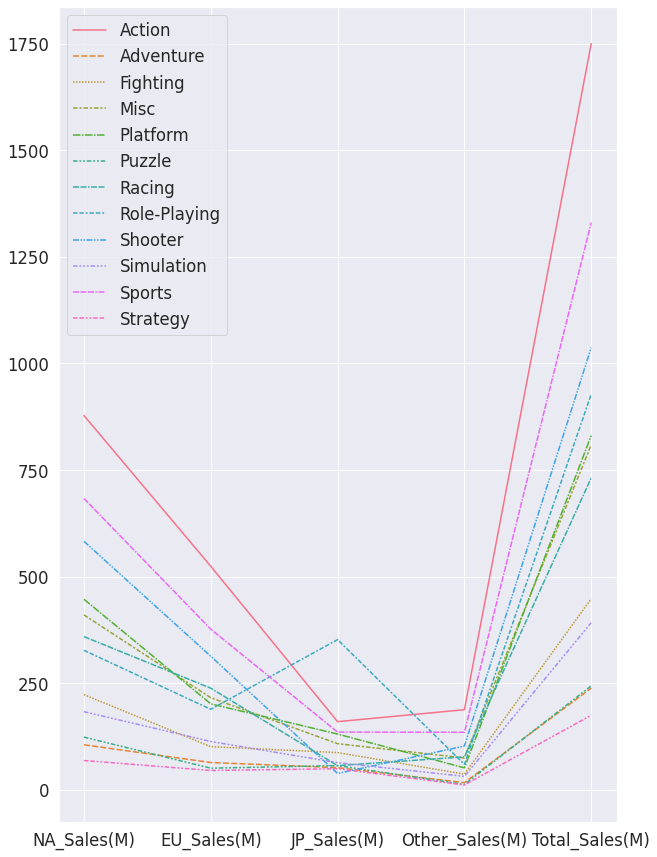

In [ ]:
import matplotlib.pyplot as plt

fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(10,15)

sns.lineplot(data=Genre_sales_market) # 한 눈에 보기 힘들다.... 

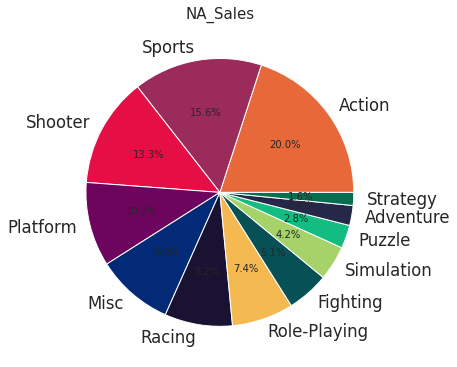

In [ ]:
#pie 차트 구성해보기 NA / EU / JP / Other / Total 
import matplotlib.pyplot as plt
colors = ['#E76939', '#9B2B5A', '#E50E45', '#6D045E','#022A76', '#191232',
'#F4B951', '#055156', '#A6D26A', '#13BC81','#252848', '#076F50']
Genre_sales_market_T = Genre_sales_market.transpose()
Genre_sales_market_T

NA_Sales_Pie = Genre_sales_market_T['NA_Sales(M)']
NA_Sales_Pie = NA_Sales_Pie.sort_values(ascending=False)
NA_Sales_Pie
plt.figure(figsize=(6,8))
plt.pie(NA_Sales_Pie, labels = NA_Sales_Pie.index, autopct = '%.1f%%', colors = colors)
plt.title('NA_Sales', size = 15) # Action, Sports, Shooter, Platform, Misc TOP 5 
print('')

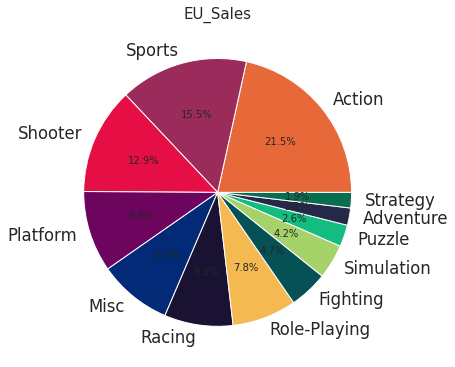

In [ ]:
EU_Sales_Pie = Genre_sales_market_T['EU_Sales(M)']
EU_Sales_Pie = EU_Sales_Pie.sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.pie(EU_Sales_Pie, labels = NA_Sales_Pie.index, autopct = '%.1f%%', colors = colors)
plt.title('EU_Sales', size = 15)

print('')

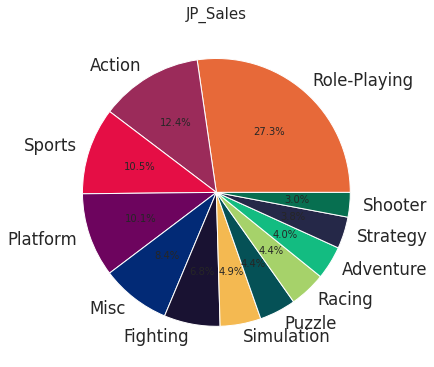

In [ ]:
JP_Sales_Pie = Genre_sales_market_T['JP_Sales(M)']
JP_Sales_Pie = JP_Sales_Pie.sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.pie(JP_Sales_Pie, labels = JP_Sales_Pie.index, autopct = '%.1f%%', colors = colors)
plt.title('JP_Sales', size = 15)
print('')

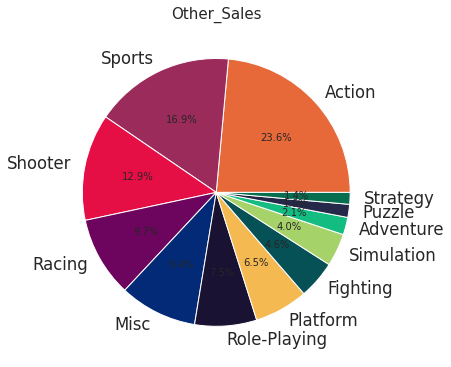

In [ ]:
Other_Sales_Pie = Genre_sales_market_T['Other_Sales(M)']
Other_Sales_Pie = Other_Sales_Pie.sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.pie(Other_Sales_Pie, labels = Other_Sales_Pie.index, autopct = '%.1f%%', colors = colors)
plt.title('Other_Sales', size = 15)
print('')

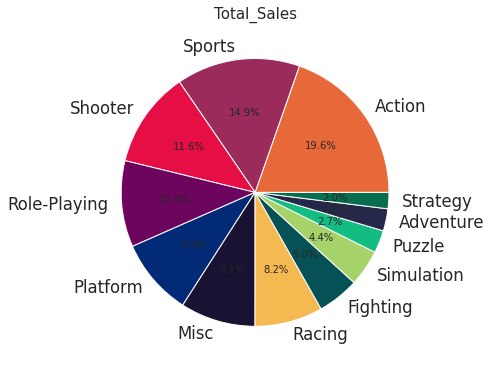

In [ ]:
Total_Sales_Pie = Genre_sales_market_T['Total_Sales(M)']
Total_Sales_Pie = Total_Sales_Pie.sort_values(ascending=False)
plt.figure(figsize=(6,8))
plt.pie(Total_Sales_Pie, labels = Total_Sales_Pie.index, autopct = '%.1f%%', colors = colors)
plt.title('Total_Sales', size = 15)
print('')


In [ ]:
# print(NA_Sales_Pie.head(7)) #Action/Sports/Shooter/Platform/Misc/Racing/Role-Playing
# print(JP_Sales_Pie.head(7)) #Role-Playing/Action/Sports/Platform/Misc/Fighting/Simulation 
# print(EU_Sales_Pie.head(7)) #Action/Sports/Shooter/Racing/Misc/Platform/Role-Playing    
# print(Other_Sales_Pie.head(7)) #Action/Sports/Shooter/Racing/Misc/Role-Playing/Platform         
# print(Total_Sales_Pie.head(7)) #Action/SportsShooter/Role-Playing/Platform/Misc/Racing           

In [ ]:
# 가설 검정 NA, JP, EU, Other끼리 ANOVA 검정
import scipy.stats as stats

F_statistic, pVal = stats.f_oneway(NA_Sales_Pie, JP_Sales_Pie, EU_Sales_Pie, Other_Sales_Pie)

print("ANOVA 결과 : F={0:.1f}, p={1:.5f}".format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value가 충분히 작기 때문에 그룹 평균값이 통계적으로 유의하게 차이납니다.')

ANOVA 결과 : F=9.0, p=0.00009
P-value가 충분히 작기 때문에 그룹 평균값이 통계적으로 유의하게 차이납니다.


### 결론 \
NA: Action/Sports/Shooter/Platform/Misc/Racing/Role-Playing\
JP: Role-Playing/Action/Sports/Platform/Misc/Fighting/Simulation \
EU: Action/Sports/Shooter/Racing/Misc/Platform/Role-Playing    \
Other: Action/Sports/Shooter/Racing/Misc/Role-Playing/Platform  \
Total: #Action/SportsShooter/Role-Playing/Platform/Misc/Racing \

결과: \
JP를 제외한 **NA, EU, Other에서는 Action, Sports, Shooter** 순으로 선호가높았다.\
**JP는 Role-Playin이 1위, Action, Sports** 순으로 갔다. \
한편 JP에서는 shooter는 순위에 없었으며 \
NA는 Platform, Misc, Racing, Role-Playin순으로 \
EU는 Racing, Misc, Platform, Role-Playing순으로\
Other은 Racing, Misc, Role-Playing, Platform 순으로 나타났다.\
즉, Racing, Misc, Platform, Role-Playing 은 국가별로 선호도의 차이가 있음을 확인할 수 있다.

## 2.2. 연도별 게임 트렌드를 알아보자

---



In [ ]:
df.info()
df_trend = df.dropna(subset=['Year']) #연도별 트렌드를 알기 위해 Year가 없는 거만 삭제
df_trend.info() #16598, 148개 삭제 
# df_trend1 = df.dropna() # 전체 삭제하면은 16387 211개 삭제 
# df_trend1.info()

df_trend_group = df_trend.groupby(['Year', 'Genre']).size().reset_index(name='Count')

df_trend_group_idx = df_trend_group.groupby(['Year'], sort=False)['Count'].transform(max) == df_trend_group['Count']
df_trend_group_max = df_trend_group[df_trend_group_idx].reset_index(drop=True)
pd.set_option('display.max_rows', None)
df_trend_group_max #max값만 출력 완료 #중복값도 의미 있는 수치이므로 빼지 않는다. 트렌드는 연속적. 
max_condition = df_trend_group_max['Count'] >= 2 #단 그 수치가 1개 인 것은 제외한다. 무의미하기 때문
df_trend_group_max = df_trend_group_max[max_condition].reset_index().drop(['index'], axis=1)
# df_trend_group_max = df_trend_group_max.drop_duplicates(subset=['Year','Count']).reset_index(drop=True)
# df_trend_group_max.rename(index = {'Count': 'Sales'}, inplace = True)
df_trend_group_max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16598 non-null  object 
 1   Platform        16598 non-null  object 
 2   Year            16450 non-null  float64
 3   Genre           16579 non-null  object 
 4   Publisher       16540 non-null  object 
 5   NA_Sales(M)     16598 non-null  float64
 6   EU_Sales(M)     16598 non-null  float64
 7   JP_Sales(M)     16598 non-null  float64
 8   Other_Sales(M)  16598 non-null  float64
 9   Total_Sales(M)  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16450 non-null  object 
 1   Platform        16450 non-null  object 
 2   Year 

,Year,Genre,Count
0,1978.0,Action,2
1,1978.0,Puzzle,2
2,1980.0,Misc,4
3,1981.0,Action,25
4,1982.0,Action,18
5,1983.0,Action,7
6,1984.0,Puzzle,3
7,1984.0,Racing,3
8,1984.0,Shooter,3
9,1985.0,Platform,4


In [ ]:
df_trend_group_max #시각화하기 
# df_trend_group_max['Genre'].value_counts() #Genre 9개 확인! 
#

,Year,Genre,Count
0,1978.0,Action,2
1,1978.0,Puzzle,2
2,1980.0,Misc,4
3,1981.0,Action,25
4,1982.0,Action,18
5,1983.0,Action,7
6,1984.0,Puzzle,3
7,1984.0,Racing,3
8,1984.0,Shooter,3
9,1985.0,Platform,4


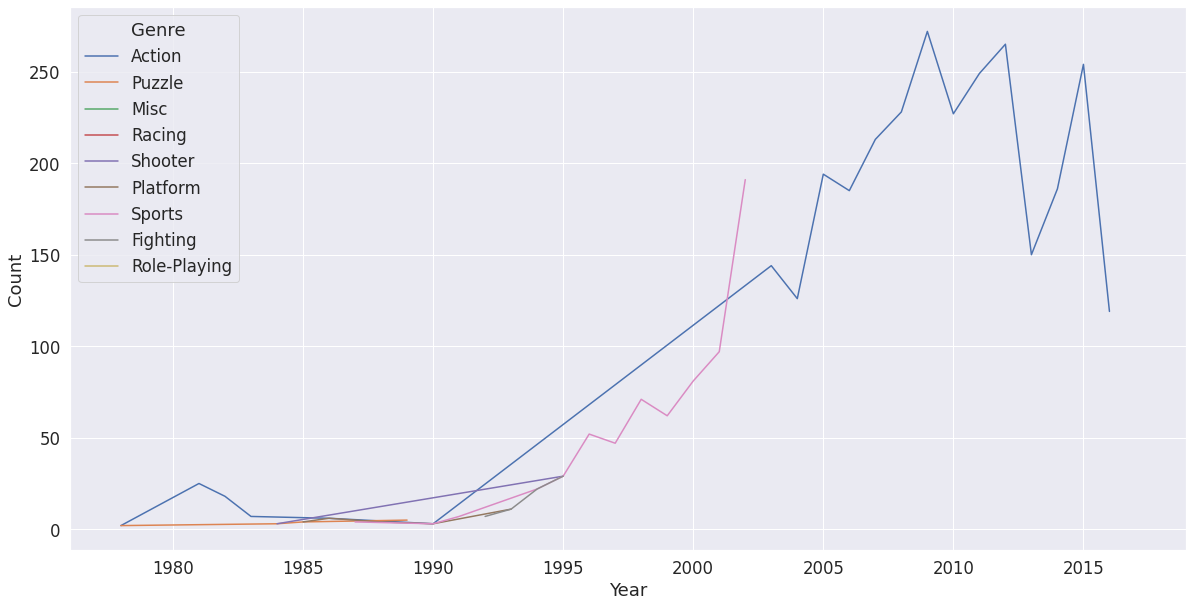

In [ ]:
# Action, Sports, Platform, Puzzle, Fighting, Shooter, Misc, Racing, Role-Playing
#전체 추세 보기 

plt.figure(figsize = (20,10))
sns.lineplot(x='Year', y='Count',hue='Genre', data=df_trend_group_max) # 전체 

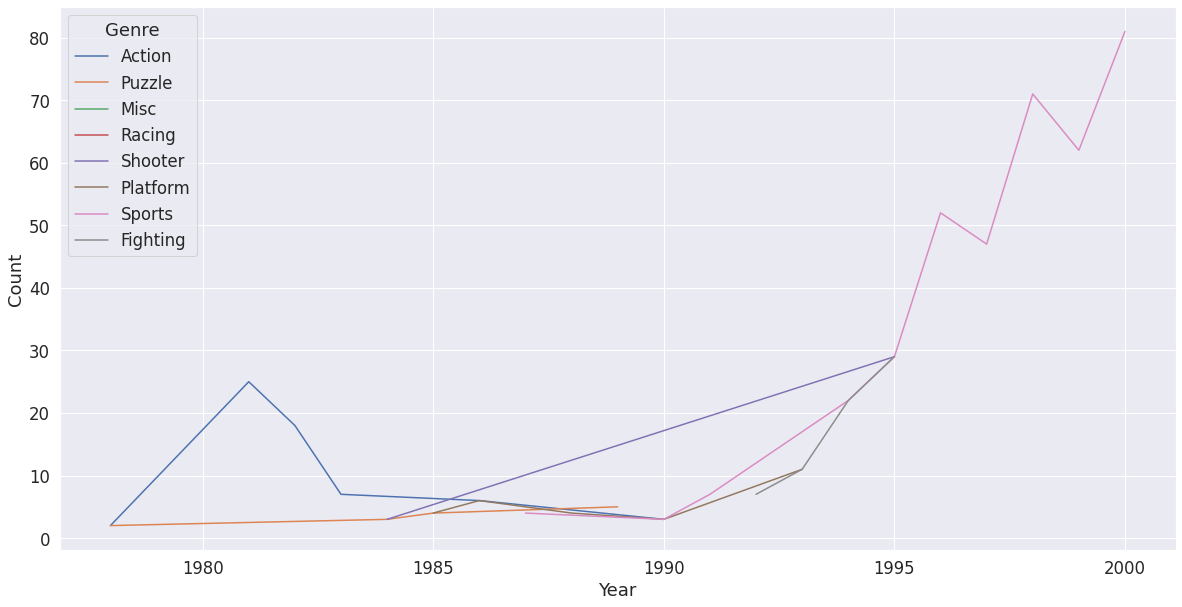

In [ ]:
#2000년 이전 추세만 보기 

plt.figure(figsize = (20,10)) #figsize =(가로, 세로)
line_condition = df_trend_group_max['Year'] <= 2000 
sns.lineplot(x='Year', y='Count',hue='Genre', data=df_trend_group_max[line_condition])


### 결론 
1980년부터 1985년까지 Action\
1985년부터 1995년까지 Shooter (실제 데이터로는 혼합되어 있음, Fighitng이 좀 더 많은듯.) \
1995년부터 2000년대까지 Sports\
그 이후로는 Action

## 2.3.출고량이 높은 게임에 대한 분석 및 시각화

---



In [ ]:
# df.sort_values(by='Total_Sales(M)', ascending=False).head(50)
df.info()
#플랫폼별로, 31개 종류.. 
# 닌텐도: DS Wii GBA GC(game cuve) 3DS N64 SNES WiiU GB NES
# 플스: PS2 PS3 PSP PS PSV PS4
# 엑박: X360 XB XOne
# 세가 SAT DC GEN(genesis) SCD(SegaCD) GG(GameGear)
# NEC: PCFX TG16(TurboGrafx16)
# etc: PC Atari2600 NG(Neogeo) WS(WonderSwan) 3DO  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16598 non-null  object 
 1   Platform        16598 non-null  object 
 2   Year            16450 non-null  float64
 3   Genre           16579 non-null  object 
 4   Publisher       16540 non-null  object 
 5   NA_Sales(M)     16598 non-null  float64
 6   EU_Sales(M)     16598 non-null  float64
 7   JP_Sales(M)     16598 non-null  float64
 8   Other_Sales(M)  16598 non-null  float64
 9   Total_Sales(M)  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


### 2.3.1 출고량 TOP10 분석(Percent to total, Year, Genre, Publisher, Platform)

---



---



In [ ]:
#출고량이 높다의 정의는 무엇일까? 
# TOP 10, TOP100, TOP500 으로 절대치로도 가능.
# 우선 TOP 10, 100, 500으로 계산해보자.
# Top10

df_top10 = df.sort_values(by='Total_Sales(M)', ascending=False).head(10)

# Top10의 매출 합 
df_top10_sum = df_top10['Total_Sales(M)'].sum()
df_sales_sum = df['Total_Sales(M)'].sum()
df_top10_portion = (df_top10_sum/df_sales_sum)
print("top10 게임이 전체 판매량에서 차지하는 비중은",  "%2f%%" % (df_top10_portion * 100.0), "입니다.")

top10 게임이 전체 판매량에서 차지하는 비중은 4.143071% 입니다.


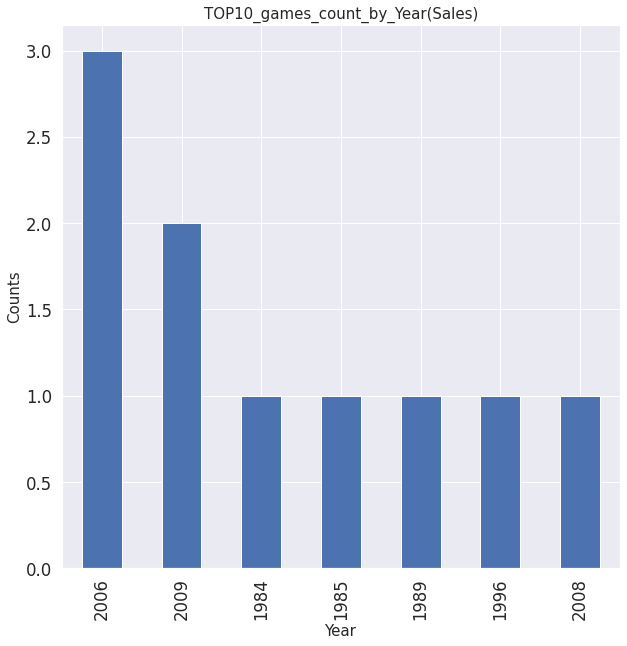

In [ ]:
df_top10 = df_top10.sort_values(by='Year', ascending=True)
df_top10

df_top10['Year'] = df_top10['Year'].astype(int)
# df_top10.info()
df_top10_year = df_top10['Year'].value_counts()

# df_top10_year = df_top10_year.sort_values(ascending=True)
# print(df_top10_year)

# # Year - barplot
plt.figure(figsize=(10, 10))
plt.title('TOP10_games_count_by_Year(Sales)', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
df_top10_year.plot.bar( )
print('')

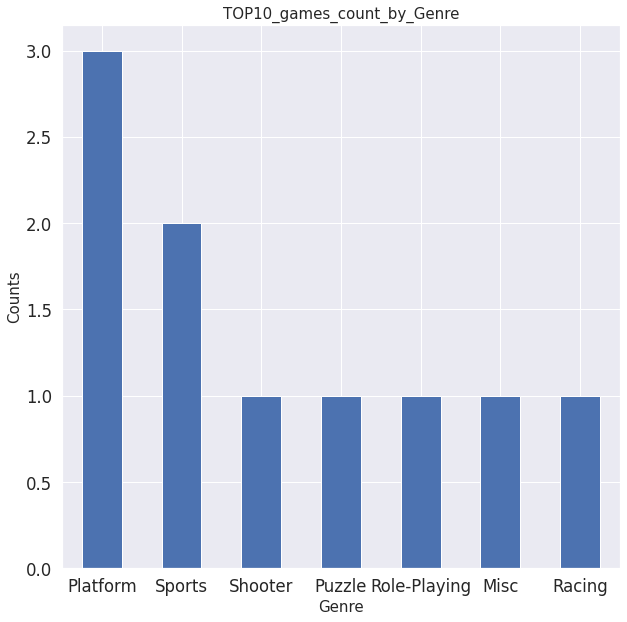

In [ ]:
# genre - barplot
plt.figure(figsize=(10, 10))
df_top10_genre = df_top10['Genre'].value_counts()
plt.title('TOP10_games_count_by_Genre', fontsize = 15)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
df_top10_genre.plot.bar(x='genre',y='count',rot=0)
print('')

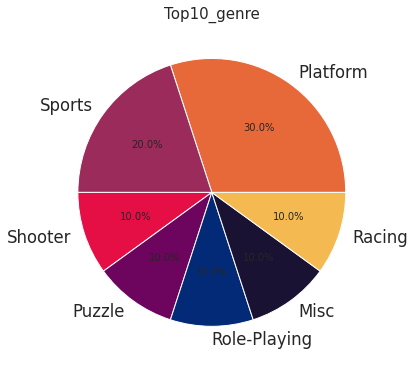

In [ ]:
# genre - pie 
plt.figure(figsize=(6,8))
df_top10_genre = df_top10['Genre'].value_counts()
plt.pie(df_top10_genre, labels = df_top10_genre.index, autopct = '%.1f%%', colors = colors)
plt.title('Top10_genre', size = 15)
print('')

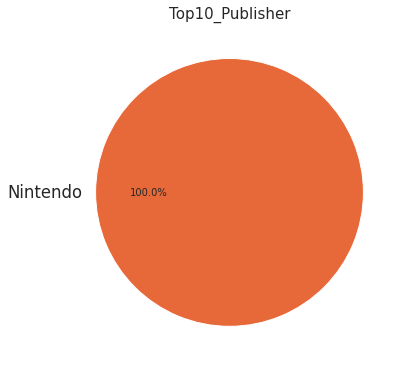

In [ ]:
# publisher - pie /// 100% Nintendo 
df_top10_publisher = df_top10['Publisher'].value_counts()
plt.figure(figsize=(6,8))
plt.pie(df_top10_publisher, labels = df_top10_publisher.index, autopct = '%.1f%%', colors = colors)
plt.title('Top10_Publisher', size = 15)
print('')

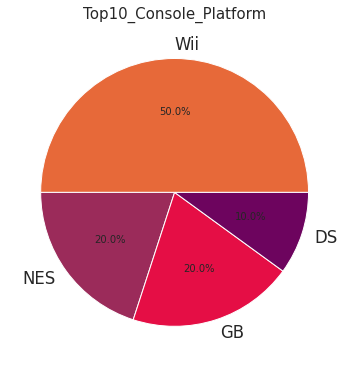

In [ ]:
# platform - pie ///  
df_top10_platform = df_top10['Platform'].value_counts()
plt.figure(figsize=(6,8))
plt.pie(df_top10_platform, labels = df_top10_platform.index, autopct = '%.1f%%', colors = colors)
plt.title('Top10_Console_Platform', size = 15)
print('')
# 닌텐도: DS Wii GB NES 플랫폼 100퍼 

### 2.3.2 출고량 TOP100 분석(Percent to total, Year, Genre, Publisher, Platform)

---



---



In [ ]:
# Top100
df_top100 = df.sort_values(by='Total_Sales(M)', ascending=False).head(100)
df_top100.info()

# Top100의 매출 합 
df_top100_sum = df_top100['Total_Sales(M)'].sum()
df_top100_portion = (df_top100_sum/df_sales_sum)

print("Top100 게임이 전체 판매량에서 차지하는 비중은",  "%2f%%" % (df_top100_portion * 100.0), "입니다.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2908 to 8010
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            100 non-null    object 
 1   Platform        100 non-null    object 
 2   Year            100 non-null    float64
 3   Genre           100 non-null    object 
 4   Publisher       100 non-null    object 
 5   NA_Sales(M)     100 non-null    float64
 6   EU_Sales(M)     100 non-null    float64
 7   JP_Sales(M)     100 non-null    float64
 8   Other_Sales(M)  100 non-null    float64
 9   Total_Sales(M)  100 non-null    float64
dtypes: float64(6), object(4)
memory usage: 8.6+ KB
Top100 게임이 전체 판매량에서 차지하는 비중은 16.398212% 입니다.


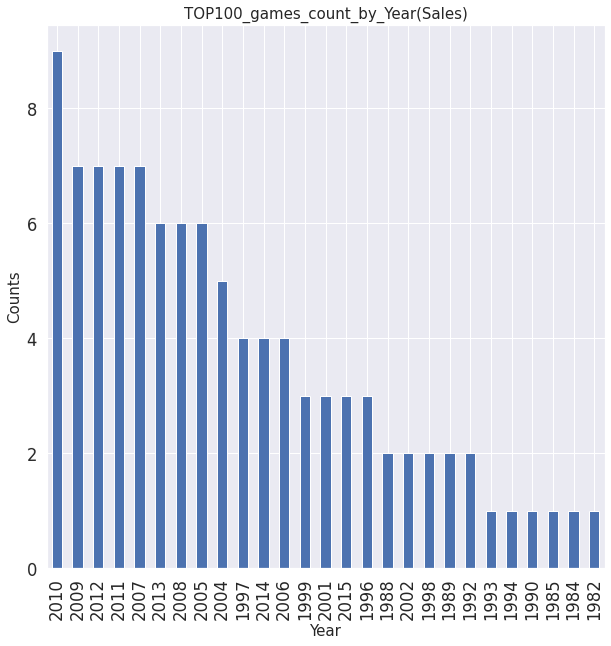

In [ ]:
#TOP100 Year
df_top100['Year'] = df_top100['Year'].astype(int)
df_top100_year = df_top100['Year'].value_counts()
# print(df_top100_year)
# Year - barplot

plt.figure(figsize=(10, 10))
df_top100_year.plot.bar( )

plt.yticks(rotation = 1)
plt.title('TOP100_games_count_by_Year(Sales)', size = 15)
plt.xlabel('Year', size = 15)
plt.ylabel('Counts', size = 15)
plt.show()

#총 100개 중 76개 (76%)가 2000년대에 출시.

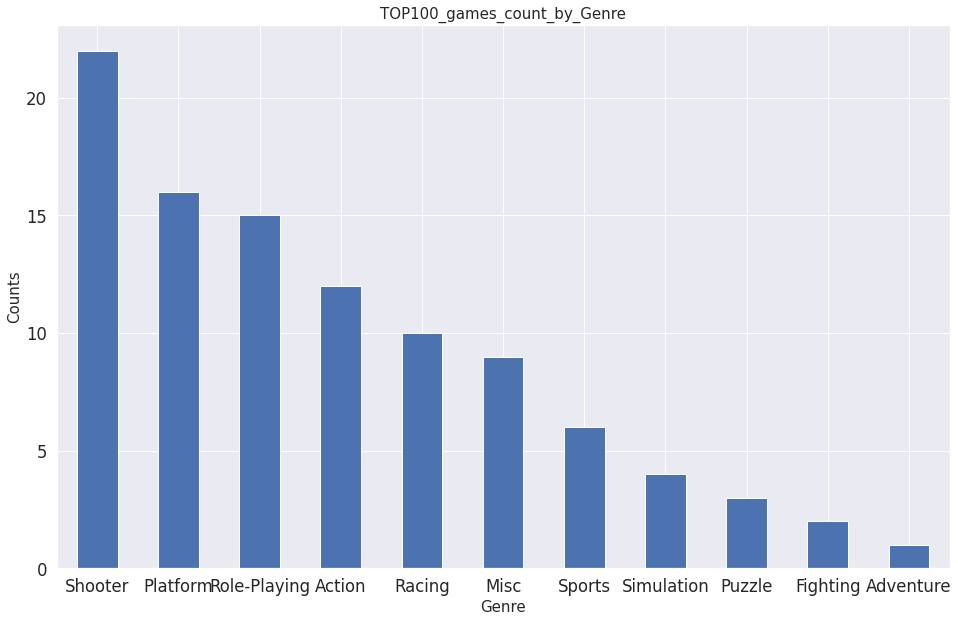

In [ ]:
#TOP100 Genre
# genre - barplot
plt.figure(figsize=(16, 10))

df_top100_genre = df_top100['Genre'].value_counts()
plt.title('TOP100_games_count_by_Genre', size = 15)
plt.xlabel('Genre', size = 15)
plt.ylabel('Counts', size = 15)
df_top100_genre.plot.bar(x='genre',y='count',rot=0)
print('')

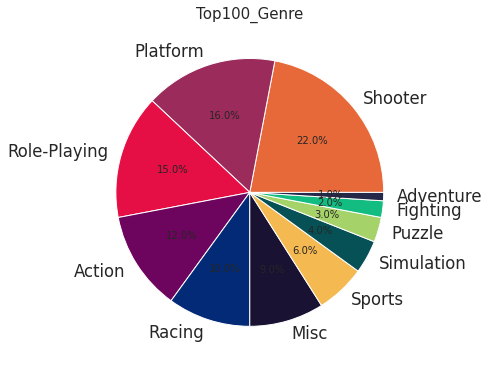

In [ ]:
plt.figure(figsize=(6,8))
df_top100_genre = df_top100['Genre'].value_counts()
plt.pie(df_top100_genre, labels = df_top100_genre.index, autopct = '%.1f%%', colors = colors)
plt.title('Top100_Genre', size = 15)
print('')

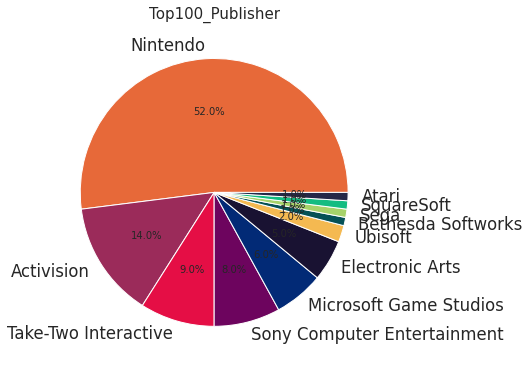

In [ ]:
#TOP100 Publisher
# publisher - pie /// 
plt.figure(figsize=(6,8))
df_top100_publisher = df_top100['Publisher'].value_counts()
plt.pie(df_top100_publisher, labels = df_top100_publisher.index, autopct = '%.1f%%', colors = colors)
plt.title('Top100_Publisher', size = 15)
print('')
# 52% Nintendo 14% Activison 9% Take-two interative 8% Sony 6% MS

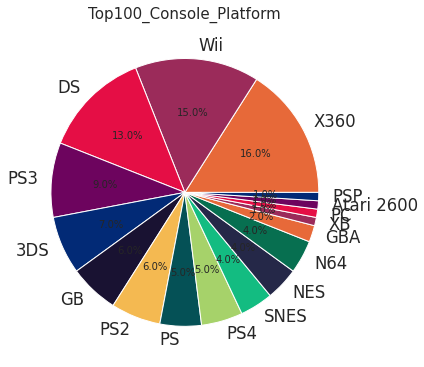

In [ ]:
#TOP100 Platform
# platform - pie ///  
plt.figure(figsize=(6,8))
df_top100_platform = df_top100['Platform'].value_counts()
plt.pie(df_top100_platform, labels = df_top100_platform.index, autopct = '%.1f%%', colors = colors)
plt.title('Top100_Console_Platform', size = 15)
print('')
# 닌텐도: 55% / 소니:26% / MS:17% 

### 2.3.3 출고량 Q1, Q2 분석(Percent to total)

---



---



In [ ]:
# 판매량 (상위) 50%이상, 25%이상. 으로 샘플 내부에서의 상대적인 비율로 추정 가능.
#TOP 25% 
pd.set_option('display.max_rows', 20)
Total_Q1 = df['Total_Sales(M)'].describe()['75%']
condition_Q1 = (df['Total_Sales(M)'] >= Total_Q1)
df_q1 = df[condition_Q1]

print("전체 기간동안 합계 판매량은 ", df_sales_sum, "(M)입니다.")

전체 기간동안 합계 판매량은  8915.85 (M)입니다.


In [ ]:
# Top25% 의 매출 합 
df_q1_sales_sum = df_q1['Total_Sales(M)'].sum()
df_q1_portion = (df_q1_sales_sum/df_sales_sum)
print("판매량 상위 25% 게임이 전체 판매량에서 차지하는 비중은",  "%2f%%" % (df_q1_portion * 100.0), "입니다.")

#더이상의 분석은 무의미

판매량 상위 25% 게임이 전체 판매량에서 차지하는 비중은 79.857894% 입니다.


In [ ]:
#TOP 50%
Total_Q2 = df['Total_Sales(M)'].describe()['50%']
condition_Q2 = (df['Total_Sales(M)'] >= Total_Q2)
df_q2 = df[condition_Q2]

In [ ]:
# Top 50%의 매출 합 
df_q2_sales_sum = df_q2['Total_Sales(M)'].sum()
df_q2_portion = (df_q2_sales_sum/df_sales_sum)
print("판매량 상위 50% 게임이 전체 판매량에서 차지하는 비중은","%2f%%" % (df_q2_portion * 100.0), "입니다.")

#더이상의 분석은 무의미

판매량 상위 50% 게임이 전체 판매량에서 차지하는 비중은 93.657699% 입니다.


# 3.새로운 게임 설계 전략

**지역에 따른 선호 게임의 장르**: \
*   NA/EU/Other - Action, Sports, Shooter \
*   JP - Role-Playing, Action, Sports \

**연도별 게임의 트렌드**: \
*   Action, Shooter, Sports, Action \


**출고량 TOP100 분석**: \
* 전체 출시 게임 대비 0.6%의 게임이 **전체 판매량 16%** 차지.
* **2000년대 출시 게임**이 전체 100개 중 76개. 76% 차지.
* Shooter(22), Platform(16), Role-playing(15), Action(12) ☞ **전체의 65%** \
* **닌텐도** 계열 55%, **PS** 계열 26%, **XB** 계열 17% ☞ **전체의 98%** \


P.S \
출고량 상위 25%, 50% ☞ 각각 전체 판매량의 79.8%, 93.6% 차지해서 무의미 \
출고량 Top10 ☞ 표본 부족(10개), Publisher, Platform Nintendo 100% 무의미








## 3.1. 시장 선정

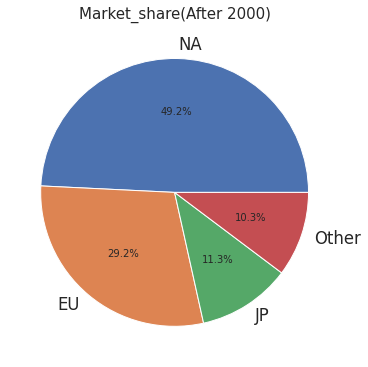

In [ ]:
# 전체 시장 시장 크기 조사 
# 2000년 이후 한해서만 조사 Why?: 출고량을 분석했을때 TOP100 중 76개가 2000년대에 출시. 2000년대 한정으로 해서 보아도 무리 없을듯.

condition_tyear = df['Year'] >= 2000
df_target = df[condition_tyear]
# df_target.info()

# 합계 재료 만들기
df_target_NA_sum = df_target['NA_Sales(M)'].sum()
df_target_EU_sum = df_target['EU_Sales(M)'].sum()
df_target_JP_sum = df_target['JP_Sales(M)'].sum()
df_target_Other_sum = df_target['Other_Sales(M)'].sum()
df_target_Total_sum = df_target['Total_Sales(M)'].sum()

# 파이 재료 만들기 
t_ratio = [df_target_NA_sum, df_target_EU_sum, df_target_JP_sum, df_target_Other_sum]
t_labels = ['NA', 'EU', 'JP', 'Other']
plt.figure(figsize=(6,8))
plt.pie(t_ratio, labels = t_labels, autopct='%.1f%%')
plt.title('Market_share(After 2000)', size = 15)
plt.rc('font', size=10) 
print('')


### 결과 
NA: 49.2% EU: 29.2% JP: 11.3% Other: 10.3% \
*  가장 큰 시장인 **북미 시장을 우선 진출**하여 Test-bed로 삼고 이를 발판삼아 두번째로 큰 시장인 유럽 시장에 진출한다. 
*   북미와 유럽을 합한 시장의 규모는 전 세계의 78.4%로 step에 따른 **진출 가능성**과 **충분한 수익이 예상** 가능.


## 3.2. 시장 별로 장르 분석

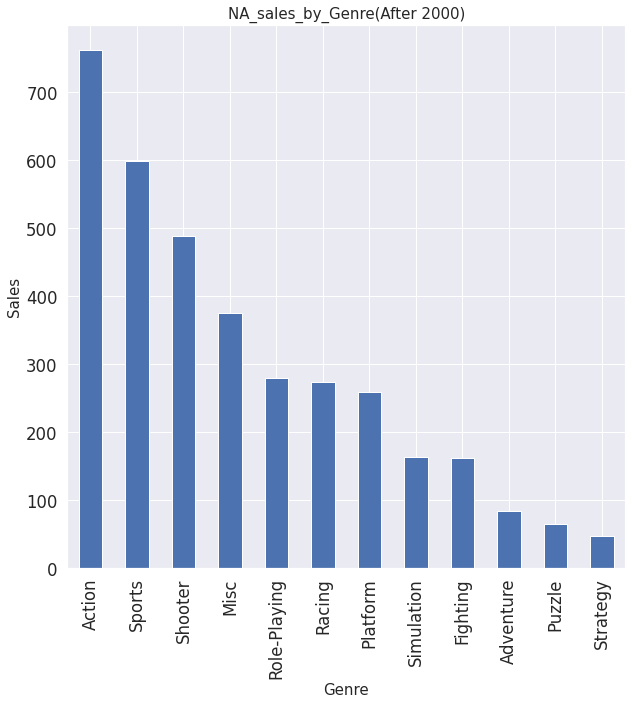

In [ ]:
# 시기 상으로는 2000년대는 Action이 압도적(JP 제외)
df_genre_group = df_target.groupby('Genre')

#na
df_genre_group_na = df_genre_group.sum()['NA_Sales(M)']
df_genre_group_na = df_genre_group_na.sort_values(ascending = False)


#eu
df_genre_group_eu = df_genre_group.sum()['EU_Sales(M)']
df_genre_group_eu = df_genre_group_eu.sort_values(ascending = False)

#jp
df_genre_group_jp = df_genre_group.sum()['JP_Sales(M)']
df_genre_group_jp = df_genre_group_jp.sort_values(ascending = False)

#Other
df_genre_group_ot = df_genre_group.sum()['Other_Sales(M)']
df_genre_group_ot = df_genre_group_ot.sort_values(ascending = False)

# plt.figure(figsize = (15,8))
# sns.set(font_scale = 1.5)
# sns.barplot(data=df_genre_group_na)

plt.figure(figsize=(10, 10))
plt.title('NA_sales_by_Genre(After 2000)', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
df_genre_group_na.plot.bar( )
print('')

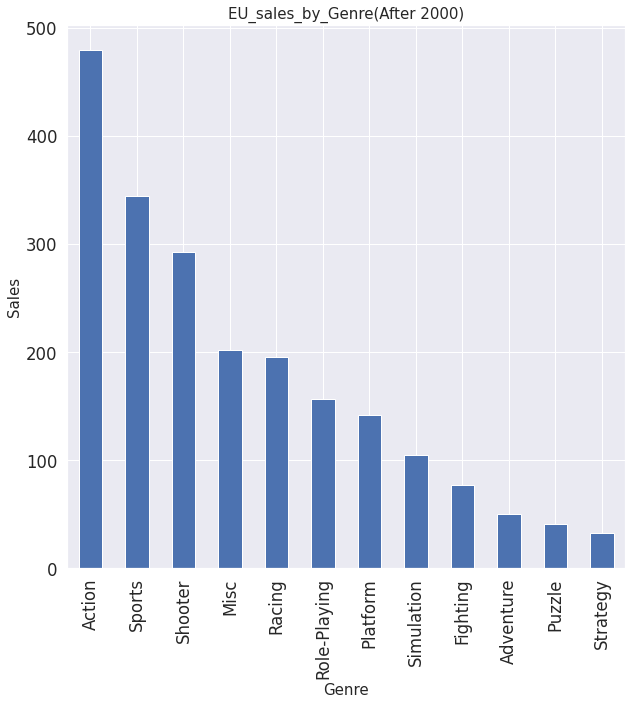

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('EU_sales_by_Genre(After 2000)', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
df_genre_group_eu.plot.bar( )
print('')

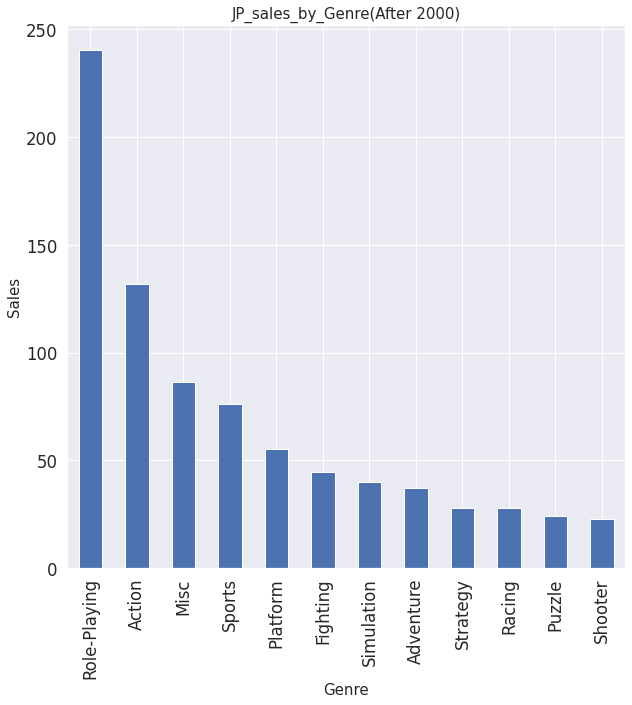

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('JP_sales_by_Genre(After 2000)', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
df_genre_group_jp.plot.bar( )
print('')

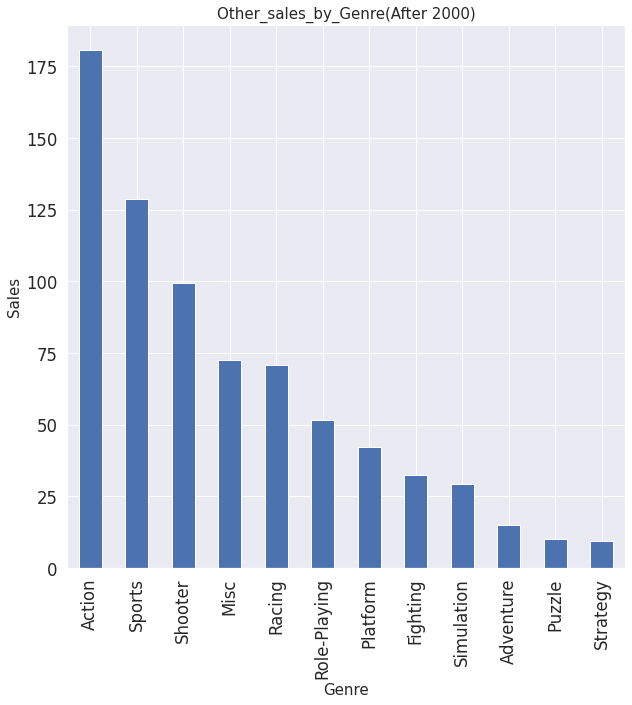

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Other_sales_by_Genre(After 2000)', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
df_genre_group_ot.plot.bar( )
print('')

### 결과
*   앞선 시장 전략에서 북미 시장 공략 후 유럽 시장 공략 전략을 세웠음.
*   북미와 유럽 시장의 step별 공략에 따라, 게임 개발 비용 최소화 및 이윤의 극대화를 위해 전략적인 장르 선택 필요함.

북미, 유럽, 기타 시장에서의 장르에 따른 판매량 모두 Action, Sports, Shooter 순으로 나타남. \

반면, 일본 시장에서는 Role-Playing, Action, Misc 순으로 나타남. 하지만 여전히 Action이 두번째로 높은 판매량을 기록하고 있다는 것에 주목할 필요 있음.

☞ 북미, 유럽, 기타 시장 모두 시장 규모가 가장 큰 'Action'으로 장르 설정 \
☞ 일본 시장도 두번째 장르가 'Action'임. \
☞ 따라서, 'Action'으로 장르를 개발하여 북미, 유럽, 기타, 일본 시장 순으로의 공략 \
☞ 이러한 전략으로 장기적으로 모든 시장에 진출 가능하며 비용의 최소화와 이윤의 극대화가 일어날 것으로 예상됨.

## 3.3 콘솔 플랫폼 분석

In [ ]:
df_platform_group = df_target.groupby('Platform')
print(df_platform_group)

#NA 분석
df_platform_group_na = pd.DataFrame(df_platform_group.sum()['NA_Sales(M)']) #dataframe으로 변환
# df_platform_group_na = df_platform_group.sum()['NA_Sales(M)'] #Series로
# df_platform_group_na = df_platform_group_na.sort_values(ascending = False)
type(df_platform_group_na)

#함수 만들어서 쓰고 싶었는데 능력부족으로 인한 불가능 ㅜㅜ 
# def platform_portion(x):
#   # Platform Compnay list
#     nintendo = ['DS', 'WII', 'GBA', 'GC', '3DS', 'N64', 'SNES', 'WiiU', 'GB', 'NES']
#     sony = ['PS2', 'PS3', 'PS3', 'PS', 'PSV', 'PS4']
#     ms = ['X360', 'XB', 'Xone']
#     sega = ['SAT', 'DC', 'GEN', 'SCD', 'GG']
#     nec = ['PCFX', 'TG']
#     etc = ['PC', 'Atari 2600', 'NG', 'WS', '3DO']   
#     if x in nintendo:
#         nintendo_sum = 0
#         nintendo_sum = nintendo_sum + x
#         print(nintendo_sum)

df_platform_na_sum = df_platform_group_na.sum()
df_platform_na_sum
# df_platform_group_na['Portion'] = df_platform_group_na['NA_Sales(M)'].div(df_platform_na_sum)
df_platform_group_na
# type(nintendo)
# condition_nintendo = (df.index == nintendo)

# platform_portion(df_platform_group_na)

,NA_Sales(M)
Platform,
3DS,78.49
DC,2.53
DS,389.93
GB,9.12
GBA,187.17
GC,132.35
N64,21.88
PC,63.75
PS,65.87


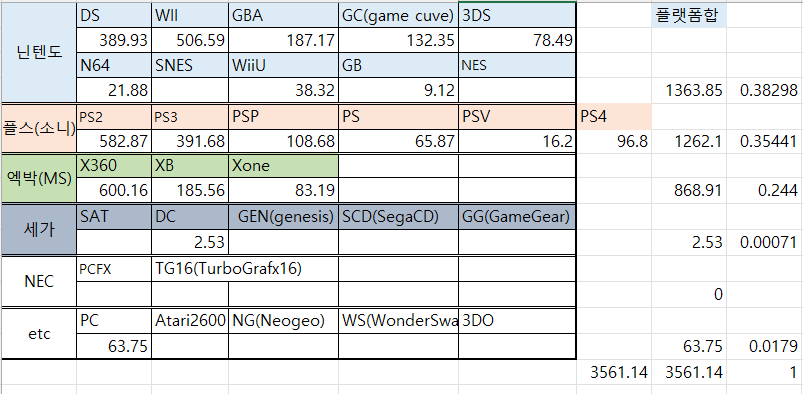

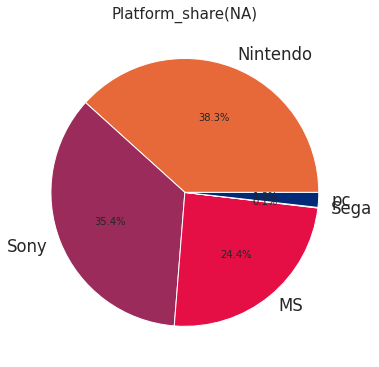

In [ ]:
df_platform_group_na_nin_por = 0.38298
df_platform_group_na_sn_por = 0.35441
df_platform_group_na_ms_por = 0.244
df_platform_group_na_sg_por = 0.00071
df_platform_group_na_pc_por = 0.0179

na_ratio = [df_platform_group_na_nin_por, df_platform_group_na_sn_por, 
            df_platform_group_na_ms_por, df_platform_group_na_sg_por,
            df_platform_group_na_pc_por]

na_labels = ['Nintendo', 'Sony', 'MS', 'Sega', 'pc']
plt.figure(figsize=(6,8))

plt.title('Platform_share(NA)', size = 15)
plt.rc('font', size=10)  
plt.pie(na_ratio, labels = na_labels, autopct = '%.1f%%', colors = colors)
print('')
# 닌텐도 38 소니 35 MS 24

In [ ]:
df_platform_group_eu = pd.DataFrame(df_platform_group.sum()['EU_Sales(M)'])
df_platform_group_eu

,EU_Sales(M)
Platform,
3DS,58.49
DC,0.79
DS,194.54
GB,5.19
GBA,75.11
GC,38.43
N64,6.13
PC,120.38
PS,47.04


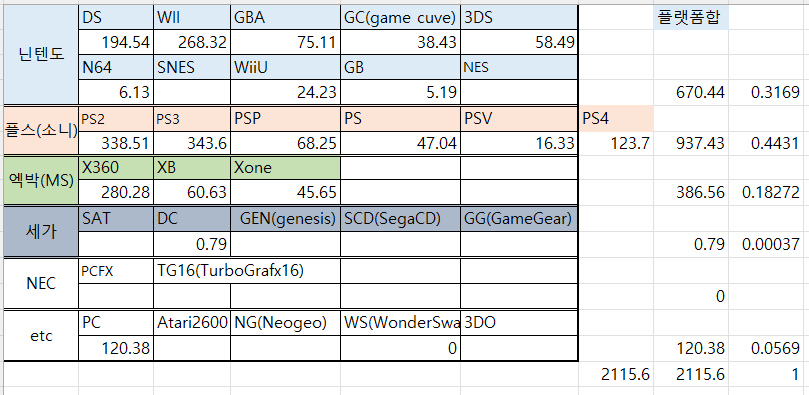

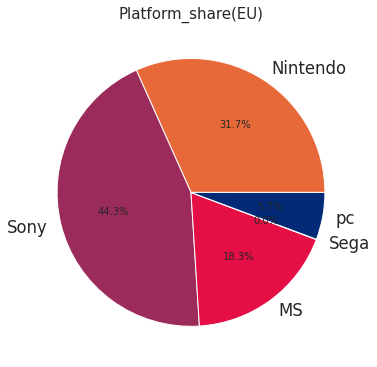

In [ ]:
df_platform_group_eu_nin_por = 0.3169
df_platform_group_eu_sn_por = 0.4431
df_platform_group_eu_ms_por = 0.18272
df_platform_group_eu_sg_por = 0.00037
df_platform_group_eu_pc_por = 0.0569

eu_ratio = [df_platform_group_eu_nin_por, df_platform_group_eu_sn_por, 
            df_platform_group_eu_ms_por, df_platform_group_eu_sg_por,
            df_platform_group_eu_pc_por]

na_labels = ['Nintendo', 'Sony', 'MS', 'Sega', 'pc']
plt.figure(figsize=(6,8))

plt.title('Platform_share(EU)', size = 15)
plt.rc('font', size=10)  
plt.pie(eu_ratio, labels = na_labels, autopct = '%.1f%%', colors = colors)
print('')
# 닌텐도 31 소니 44 MS 18

### 결과
* TOP100 결과: **닌텐도: 55%** / 플스:26% / MS17% 
* 북미 결과: **닌텐도: 38%** / 소니 35% / MS 24%
* 유럽 결과: 닌텐도: 31% / **소니 44%** / MS 18%

☞ **북미**에서의 닌텐도와 소니의 점유율 차이는 3%p밖에 나지 않지만,
**유럽에서의 차이는 13%p**로 **북미 차이의 약 4배**에 달한다. \
☞ 이에, **소니의 PlayStation 게임을 먼저 개발**한다. 소니의 콘솔 기기가 북미와 유럽에서 **더욱 범용성**이 있는 것으로 보이기 때문. \
☞ **PlayStation으로 게임을 출시한 후**, 닌텐도 콘솔에 맞는 게임을 출시할 때에 각종 예상하지 못한 오류, 게임 플레이 등을 수정하여 \
 **닌텐도에서는 더욱 높은 완성도**를 지닌 게임으로 출시